<a href="https://colab.research.google.com/github/ChapeuG/Bootcamp-Data-Science-Aplicada-2020/blob/main/Gabriel_Rodrigues_Super_Desafio_Modulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

(construção)

Hipoteses: 
1- Dias de atraso Covid [link](https://colab.research.google.com/drive/1lZ2eVAsUv9GBoGJNSjLSTyYIfOWHzcW3#scrollTo=0QwLy2HsBa26)
2- Mortalidade vs Frequência[link](https://colab.research.google.com/drive/1lZ2eVAsUv9GBoGJNSjLSTyYIfOWHzcW3#scrollTo=WLUBJbVjnggC&line=1&uniqifier=1)

## Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.


###Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

pd.options.display.float_format = "{:.2f}".format

In [ ]:
pip install plotly==4.12.0

#Referências 

A base de dados  encontradas no meu repositório do [Github](https://github.com/ChapeuG/Bootcamp-Data-Science-Aplicada-2020)

**Bancos de dados**

## **COVID**

Dataset covid19 do Brasil.IO

link: https://github.com/turicas/covid19-br/blob/master/api.md#casos

Data:11/11/2000

Périodo utilizado:Fev/2020 á NOV/2020

## **Obitos**
Dados de óbitos e tipos de óbitos retirados do DATASUS do KAGLE 

link: https://www.kaggle.com/amandalk/registered-deaths-brazil

Data:11/11/2000

Périodo utilizado:1970 á 2020

## **TABNET**

Dados de óbitos e tipos de óbitos retirados do DATASUS

**Essa base de dados pode sofrer alterações até o Ano de 2021, visto que podem existir mais mortes ou ter registros não contabilizados

link: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/nruf.def

Data: 11/11/2000

Périodo utilizado:Jan 2008 à Ago 2020

**Bibliografia**

Uso do Datasus para avaliação dos padrões das internações psiquiátricas, Rio Grande do Sul: [Link](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0034-89102007000500017)

pna covid(IBGE) https://covid19.ibge.gov.br/pnad-covid/

#Base de dados

In [ ]:
pip install fsspec

In [ ]:
fonte_covid = 'https://github.com/ChapeuG/Bootcamp-Data-Science-Aplicada-2020/blob/main/dados/Covid/COVID19-BRASILIO-06-11-2020.csv.gz?raw=true'
dados_covid = pd.read_csv(fonte_covid,
                          compression='gzip', header=0, sep=',')
#Dados diários mais recentes do coronavírus por município brasileiro

In [ ]:
fonte_obitos = "https://raw.githubusercontent.com/ChapeuG/Bootcamp-Data-Science-Aplicada-2020/main/dados/Obitos/obitos-registro-civil.csv"
#Obitos desde 1970
dados_obitos =pd.read_csv(fonte_obitos)

###Entendendo nossos Datasets

Casos Covid

In [ ]:
dados_covid.sample(5)
#Entendo a nossa base de dados do COVID

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
111668,2020-08-30,BA,Filadélfia,city,362,5,90,False,16377.00,16345.00,2910859.00,2214.74,0.01
215243,2020-10-05,MA,Zé Doca,city,3635,36,177,False,51714.00,51956.00,2114007.00,6996.30,0.01
292923,2020-08-05,PA,São João de Pirabas,city,200,18,104,False,23045.00,23244.00,1507474.00,860.44,0.09
130355,2020-06-17,BA,Macaúbas,city,4,0,17,False,49826.00,50161.00,2919801.00,7.97,0.00
495273,2020-04-09,MG,Patos de Minas,city,5,0,6,False,152488.00,153585.00,3148004.00,3.26,0.00


In [ ]:
dados_covid

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.00,894470.00,12.00,3493.47,0.02
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.00,894470.00,12.00,3490.11,0.02
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.00,894470.00,12.00,3461.49,0.02
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.00,894470.00,12.00,3460.60,0.02
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.00,894470.00,12.00,3460.26,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
936865,2020-06-23,SP,Óleo,city,1,0,5,False,2496.00,2471.00,3533809.00,40.47,0.00
936866,2020-06-22,SP,Óleo,city,1,0,4,False,2496.00,2471.00,3533809.00,40.47,0.00
936867,2020-06-21,SP,Óleo,city,1,0,3,False,2496.00,2471.00,3533809.00,40.47,0.00
936868,2020-06-20,SP,Óleo,city,1,0,2,False,2496.00,2471.00,3533809.00,40.47,0.00


In [ ]:
#vamos adicionar a coluna de região
dados_covid['region'] = dados_covid['state']

dados_covid["region"].replace(["AM","RR","AP","PA","TO","RO","AC"], "Norte", inplace=True)
dados_covid["region"].replace(["MA","PI","CE","RN","PE","PB","SE","AL","BA"], "Nordeste", inplace=True)
dados_covid["region"].replace(["MT","MS","GO","DF"], "Centro-Oeste", inplace=True)
dados_covid["region"].replace(["PR","RS","SC"], "Sul", inplace=True)
dados_covid["region"].replace(["SP","RJ","ES","MG"], "Sudeste", inplace=True)
dados_covid.sample(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
304299,2020-06-25,PB,Cacimbas,city,30,1,35,False,7173.00,7199.00,2503555.00,416.72,0.03,Nordeste
248030,2020-07-30,GO,Rialma,city,150,1,108,False,10918.00,10940.00,5218607.00,1371.12,0.01,Centro-Oeste
693806,2020-05-06,SC,Lages,city,35,0,46,False,157544.00,157349.00,4209300.00,22.24,0.00,Sul
506284,2020-06-04,MG,Riacho dos Machados,city,1,0,27,False,9481.00,9476.00,3154507.00,10.55,0.00,Sudeste
779575,2020-10-23,RS,Sant'Ana do Livramento,city,587,6,215,False,77027.00,76321.00,4317103.00,769.12,0.01,Sul


In [ ]:
dados_covid.info()
#info para saber os tipos de variáveis que possuímos e quais são nulas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            936870 non-null  object 
 1   state                           936870 non-null  object 
 2   city                            930535 non-null  object 
 3   place_type                      936870 non-null  object 
 4   confirmed                       936870 non-null  int64  
 5   deaths                          936870 non-null  int64  
 6   order_for_place                 936870 non-null  int64  
 7   is_last                         936870 non-null  bool   
 8   estimated_population_2019       933215 non-null  float64
 9   estimated_population            933215 non-null  float64
 10  city_ibge_code                  933215 non-null  float64
 11  confirmed_per_100k_inhabitants  919888 non-null  float64
 12  death_rate      

a própria documentação avisa que existe dados desatualizados na coluna estimated_population_2019 por isso vamos excluir ela do nosso dataset 

"estimated_population_2019 = ATENÇÃO: essa coluna possui valores desatualizados, prefira usar a coluna estimated_population." 

In [ ]:
#excluindo a coluna
dados_covid = dados_covid.drop('estimated_population_2019', axis=1)

Óbitos

In [ ]:
dados_obitos.sample(5)
#Entendo a nossa base de dados do obitos

,year,month,state,deaths
6054,1992,7,TO,5
5064,1989,3,GO,358
12468,2012,10,AM,76
6660,1994,8,AL,342
4563,1987,6,PE,4178


In [ ]:
dados_obitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15030 entries, 0 to 15029
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    15030 non-null  int64 
 1   month   15030 non-null  int64 
 2   state   15030 non-null  object
 3   deaths  15030 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 469.8+ KB


In [ ]:
#Tamanho do nossos Datasets
dados_covid.shape
dados_obitos.shape
print('No Datasets de casos de covid temos {} linhas e {} colunas'.format(dados_covid.shape[0],dados_covid.shape[1]))
print('No Datasets de Óbitos temos {} linhas e {} colunas'.format(dados_obitos.shape[0],dados_obitos.shape[1]))

No Datasets de casos de covid temos 936870 linhas e 13 colunas
No Datasets de Óbitos temos 15030 linhas e 4 colunas


Adcionar uma análise aos dados Nulos e como podemos trabalhar

#COVID

Para trabalhar de forma eficiente vou focar nos casos por Estado e não Cidade

In [ ]:
dados_covid_por_estado = dados_covid
dados_covid_por_estado = dados_covid_por_estado.query("place_type == 'state' ")
dados_covid_por_estado.drop('city', axis= 1, inplace= True)
dados_covid_por_estado

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
0,2020-11-05,AC,state,31248,697,234,True,894470.00,12.00,3493.47,0.02,Norte
1,2020-11-04,AC,state,31218,696,233,False,894470.00,12.00,3490.11,0.02,Norte
2,2020-11-03,AC,state,30962,695,232,False,894470.00,12.00,3461.49,0.02,Norte
3,2020-11-02,AC,state,30954,693,231,False,894470.00,12.00,3460.60,0.02,Norte
4,2020-11-01,AC,state,30951,693,230,False,894470.00,12.00,3460.26,0.02,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...
822221,2020-02-29,SP,state,2,0,5,False,46289333.00,35.00,0.00,0.00,Sudeste
822222,2020-02-28,SP,state,2,0,4,False,46289333.00,35.00,0.00,0.00,Sudeste
822223,2020-02-27,SP,state,1,0,3,False,46289333.00,35.00,0.00,0.00,Sudeste
822224,2020-02-26,SP,state,1,0,2,False,46289333.00,35.00,0.00,0.00,Sudeste


In [ ]:
#Confirmando quantos Estados aparecem no boletim
dados_covid_por_estado.state.unique()

array(['AC', 'AP', 'AM', 'AL', 'DF', 'CE', 'ES', 'BA', 'MS', 'MA', 'GO',
       'MT', 'PA', 'PB', 'PE', 'PI', 'MG', 'RO', 'RJ', 'RN', 'PR', 'RR',
       'SE', 'SC', 'RS', 'TO', 'SP'], dtype=object)

#### ANÁLISES E HIPOTESES:
*   Frequência de Registro
*   Casos confirmados
*   Taxa de mortalidade



In [ ]:
regioes = dados_covid[['region', 'date', 'deaths']].groupby(by=['region','date']).sum()
regioes.reset_index(inplace=True)
regioes.tail()

,region,date,deaths
1215,Sul,2020-11-01,23074
1216,Sul,2020-11-02,23100
1217,Sul,2020-11-03,23224
1218,Sul,2020-11-04,23401
1219,Sul,2020-11-05,20374


In [ ]:
fig = regioes.plot(
    #kind='bar',
    backend='plotly', x='date', y='deaths', color='region')

fig.update_layout(
    template = 'plotly_white',
    title='Número de Mortes por COVID por Região',
    xaxis_title='Mortes',
    yaxis_title='Mês/Ano',
    autosize = True      
)

Uma hipótese sobre os dentes é que pode existir um atraso nos envios (finais de semana) ou Estados/regiões que não enviaram em uma certa data.

ex:
(1 de Nov no Sudeste(Domingo),17 de Out Nordeste( Sábado),
25 de Out Sul(Domingo) e 6,12 e19 de Set Nordeste)

Obs: olhei bem por cima, depois pretendo validar essas hipótese

#Próximos passos



2.   Validar a hipotese sobre os atrasos
3.   Bonus: Usar mapa de calor do Brazil para comparar as regiões(https://plotly.com/python/mapbox-county-choropleth/) 



In [ ]:
#filtrando as colunas que vou utilizar
dados_covid_por_estado_filtrados =dados_covid_por_estado.filter(items=['state','confirmed','deaths','is_last','death_rate','region'])
dados_covid_por_estado_filtrados.sample(5)

,state,confirmed,deaths,is_last,death_rate,region
19818,AL,90254,2216,False,0.02,Nordeste
651967,RR,51450,661,False,0.01,Norte
40,AC,27859,656,False,0.02,Norte
174706,MA,22786,784,False,0.03,Nordeste
566875,RN,40767,1479,False,0.04,Nordeste


In [ ]:
#Contagem da frequência de registros por estados
Count_UF = dados_covid_por_estado_filtrados.state.value_counts(ascending=False) 
#realizando a proporção e normalizando
proporcao_registro = (dados_covid_por_estado_filtrados.state.value_counts(normalize=True)*100).round(2)

In [ ]:
# criando dataframe para visualizar os dados
registro_estados = pd.DataFrame({ 'Frequencia' : Count_UF})
registro_estados.reset_index(drop=False, inplace= True)
registro_estados.rename({'index' : 'UF'}, axis=1, inplace= True)

Vou realizar análise puxando os dados do último Boletim que pelo que entendi da documentação são os dados mais atuais e contém informação dos boletins anteriores


Filtrando pelo ultimo boletim pela coluna "Is_late" e pegando os casos confirmados

In [ ]:
ultimo_registro = dados_covid_por_estado_filtrados.query("is_last == True").sort_values('confirmed', ascending=False)

Filtrando pelo ultimo boletim pela coluna "Is_late" e pegando o toal de mortes

In [ ]:
ultimo_registro_mortes = dados_covid_por_estado_filtrados.query("is_last == True").sort_values('deaths', ascending=False)
ultimo_registro_mortes = ultimo_registro_mortes[['state','deaths']]

Passar os gráficos para plotpy (?)

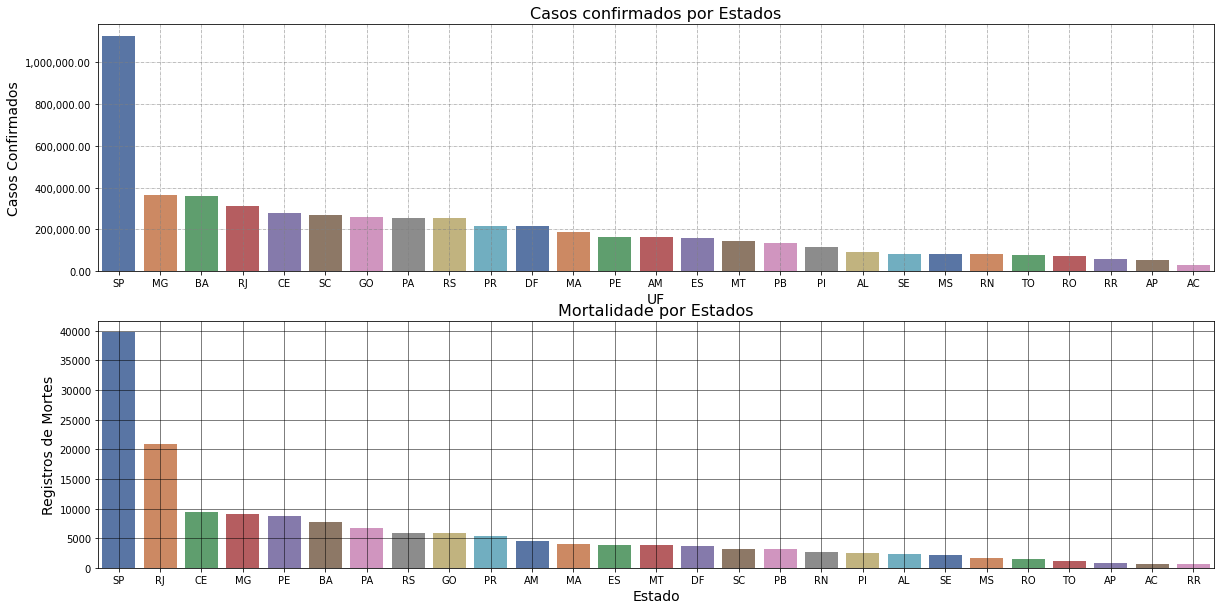

In [ ]:
fig, sub = plt.subplots(2,1, figsize = (30, 30))
#Metodo para plotar + de um gráfico 
#Gráfico casos confirmados
ax =sns.barplot(x=ultimo_registro.state, y= ultimo_registro.confirmed, palette="deep",ax=sub[0])
ax.figure.set_size_inches(20, 10)
ax.set_title('Casos confirmados por Estados', fontsize = 16)
ax.set_xlabel('UF', fontsize= 14)
ax.set_ylabel('Casos Confirmados', fontsize = 14)
ax.grid(color='grey', linestyle='-.', linewidth=0.5, )
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.grid(color='black', linestyle='-', linewidth=0.5)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) #formatação dos números

#Mortalidade por estados
ax2 = sns.barplot(x=ultimo_registro_mortes.state, y= ultimo_registro_mortes.deaths, palette="deep",ax=sub[1])
ax2.figure.set_size_inches(20,10)
ax2.set_title('Mortalidade por Estados', fontsize = 16)
ax2.set_xlabel('Estado', fontsize= 14)
ax2.set_ylabel('Registros de Mortes', fontsize = 14)
ax2.grid(color='grey', linestyle='-.', linewidth=0.5, )
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(color='black', linestyle='-', linewidth=0.5)

#Levantei a hipotese para comparar a taxa de mortalidade vs a freqência de registros dos casos

Ou seja, o estado que mais registra é aquele que realiza mais testes sendo assim impede uma taxa de contagio maior e pode começar o tratamento mais cedo. 

Pensando nisso, pesquisei para ver se existia uma base de dados para buscar informações sobre testagem, achei a PNAD Covid do IBGE que traz essa e mais algumas informações.

Sendo assim  vou comparar a taxa de Registro/Mortalidade e a taxa de testagem

In [ ]:
ultimo_registro_taxa = dados_covid_por_estado_filtrados.query("is_last == True").sort_values('death_rate', ascending=False)
ultimo_registro_taxa = ultimo_registro_taxa[['state','death_rate']]

In [ ]:
# criando dataframe para visualizar os dados
registro_estados = pd.DataFrame({ 'Frequencia' : Count_UF})
registro_estados.reset_index(drop=False, inplace= True)
registro_estados.rename({'index' : 'UF'}, axis=1, inplace= True)

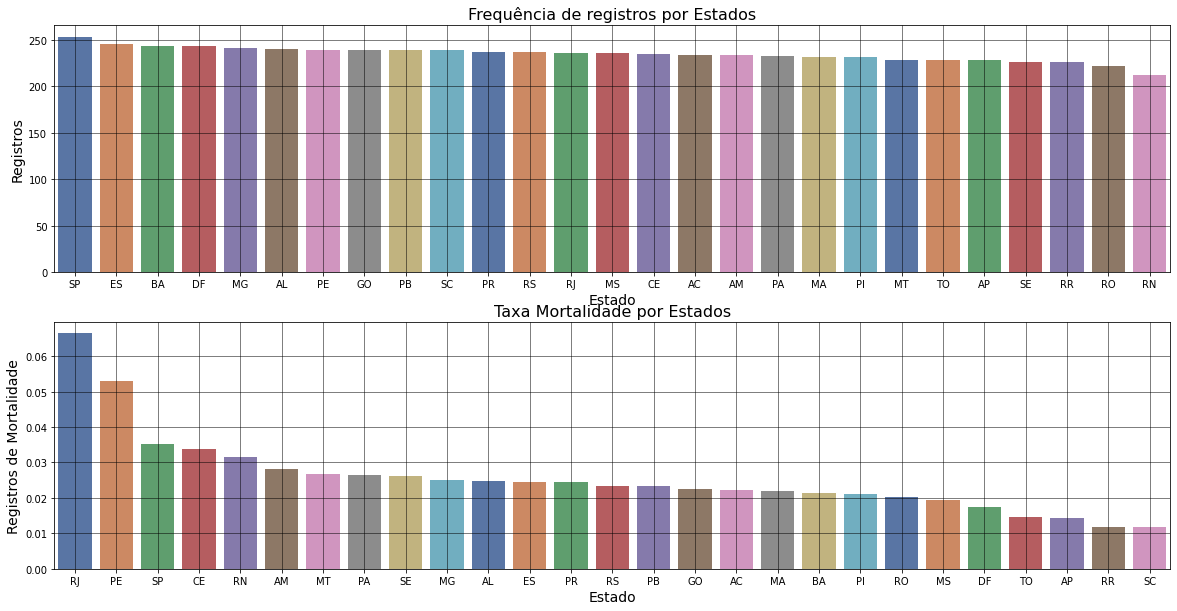

In [ ]:
fig, sub = plt.subplots(2,1, figsize = (20,10))

#Freqência de registros por estados
ax = sns.barplot(x=registro_estados.UF, y= registro_estados.Frequencia, palette="deep",ax=sub[0])
ax.figure.set_size_inches(20,10)
ax.set_title('Frequência de registros por Estados', fontsize = 16)
ax.set_xlabel('Estado', fontsize= 14)
ax.set_ylabel('Registros', fontsize = 14)
ax.grid(color='grey', linestyle='-.', linewidth=0.5, )
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(color='black', linestyle='-', linewidth=0.5)

#Taxa de Mortalidade por estados
ax2 = sns.barplot(x=ultimo_registro_taxa.state, y= ultimo_registro_taxa.death_rate, palette="deep",ax=sub[1])
ax2.figure.set_size_inches(20,10)
ax2.set_title('Taxa Mortalidade por Estados', fontsize = 16)
ax2.set_xlabel('Estado', fontsize= 14)
ax2.set_ylabel('Registros de Mortalidade', fontsize = 14)
ax2.grid(color='grey', linestyle='-.', linewidth=0.5, )
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(color='black', linestyle='-', linewidth=0.5)

#Próximos passos

1.   comparar os gastos na saude com a mortalidade 
3.   Comparar os obitos vs a mortes do covid
4.   Ver a variação de outras mortes em relação a quarentena
5.  Comparar o valor gasto por habitante vs mortalidade




#Comparação dos obitos

##KAGLE

In [ ]:
obitos_2020 = dados_obitos.query('year == 2020')
obitos_por_estado_2020 = obitos_2020.groupby(by='state')['deaths'].sum().to_frame().reset_index()
obitos_por_estado_2020 = obitos_por_estado_2020.sort_values('deaths', ascending=False)

In [ ]:
obitos_por_estado_2020.sample(5)

,state,deaths
11,MS,11254
24,SE,9644
17,PR,49242
18,RJ,113037
15,PE,49250


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=obitos_por_estado_2020.state,y=obitos_por_estado_2020.deaths,
    name='Mortes',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=ultimo_registro_mortes.state,y=ultimo_registro_mortes.deaths,
    name='Mortes por Covid',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

http://tabnet.saude.prefeitura.sp.gov.br/cgi/tabcgi.exe?secretarias/saude/TABNET/SIM_PROV/obitop.def

Obitos de SP

##DataSus